# Assignment 3: MNIST

Dataset: https://www.kaggle.com/c/digit-recognizer

This is a classification problem. There are 10 [0-9 digits] classes and we want to be able to classify any hand written digit.


# Load and import MNIST dataset

In [1]:
import pandas as pd

# Load train data
df = pd.read_csv('digit-recognizer/train.csv')

# Load the test data
test_df = pd.read_csv('digit-recognizer/test.csv')

# Verify that it was loaded correctly

In [2]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


# Import all the main libraries that will be used

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split 

# Distribution of the training set

Text(0.5, 1.0, 'Training Data Digits Distribution')

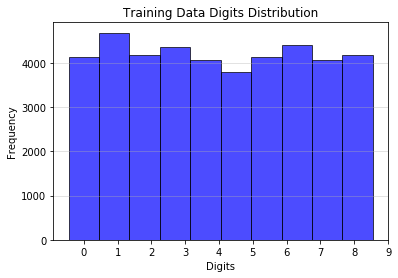

In [7]:
%matplotlib inline

n, bins, patches = plt.hist(x=df['label'], bins=10,  color=['blue'],
                            alpha=0.7,  edgecolor='black',  align='left')
plt.grid(axis='y', alpha=0.45)
plt.xticks(np.arange(0,10, 1))
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.title('Training Data Digits Distribution')


# Example Number

Each pixel has a value of 0 to 255.

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  82 152  71  51  51  21  41  51  51  51  51 113 193 152
  30   0   0   0   0   0   0   0   0   0   0   0   0   0 122 253 252 253
 252 223 243 253 252 253 252 253 252 233  30   0   

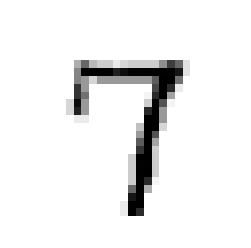

In [8]:
a_number = df.iloc[:,1:]
a_number = a_number.iloc[6]

a_number_v = a_number.values
print(a_number_v)

a_number = a_number_v.reshape((28,28))

plt.imshow(a_number, cmap = plt.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

# Splitting the columns into features and target

In [9]:
# Train
X_features = df.drop('label', axis=1) # Keep all except for the "label" column
y_target = df[['label']] # Only keep the "label" as it is our target variable

X_features.info()
print('\n')
y_target.info()
print('\n')

# Test
X_features_test = test_df#.drop('label', axis=1) # the test is good to go, no need to change anything

X_features_test.info()
print('\n')
X_features_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 1 columns):
label    42000 non-null int64
dtypes: int64(1)
memory usage: 328.2 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB




,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Define function to re-use with all classifiers

In [10]:
def testClassifier(X, y, classifier, use_data_subset_size=False, export=False, X_Test_Data=None):
    '''
    Classifier tester with required transformations. Uses all or a subset of instances from
    the dataset. It also splits the train/test data, trains it, predicts it, then prints
    out the accuracy for the classifier.
    
    inputs:
        X (dataFrame): the features of training set
        y (dataFrame): the target of training set
        classifier (object): the classifier object to use
        use_data_subset_size (int): training sample size to use, False is the default
        export (bool): if want to export the tests results from test data
        X_Test_Data (dataFrame): the test data features, export must be set to True for it to be used
    '''
    
    # In case we want to test a on smaller subset as 42,000 instances may
    # be overwhelming
    if use_data_subset_size:
        X = X.iloc[:use_data_subset_size]
        y = y.iloc[:use_data_subset_size]
    
    # Split the test and train data into 20/80 respectively
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

    # Train the Classifier
    model = classifier.fit(X_train, y_train.values.ravel())

    # Predict the response for test dataset
    y_pred = model.predict(X_test)
    
    print("Classifier:", classifier.__class__.__name__)
    print("Train sample size:", len(X))
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    
    if export:
        if X_Test_Data is not None:
            test_df_output = test_df.copy()

            # Use trained model to predict our test data
            test_df_output['Label'] = model.predict(X_Test_Data)

            test_df_output.index = test_df.index + 1

            # Expected test format: ImageId,Label
            test_df_output[['Label']].to_csv('predictions.csv', index=True, index_label="ImageId")

            print('Done exporting')


## Set sample size

In [11]:
# Define how many instances of the entire dataset (42,000) we want to use
SUBSET_SAMPLE = 20000

# Trying out several classifiers

## Logistic Regression

Logistic gives really good results even with small training set. Though it is a bit slow to train. 

Here is a run example:

- Train sample size: 20000
- Accuracy: 0.90025

In [13]:
from sklearn.linear_model import LogisticRegression

testClassifier(X_features, y_target, 
               LogisticRegression(solver='sag', multi_class='auto'), 
               SUBSET_SAMPLE, 
               export=False, 
               X_Test_Data=X_features_test)


Classifier: LogisticRegression
Train sample size: 20000
Accuracy: 0.90025


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## Decision Tree with Gini

In [14]:
from sklearn.tree import DecisionTreeClassifier

testClassifier(X_features, 
               y_target, 
               DecisionTreeClassifier(criterion="gini", max_depth=None), 
               SUBSET_SAMPLE, 
               export=False, 
               X_Test_Data=X_features_test)

Classifier: DecisionTreeClassifier
Train sample size: 20000
Accuracy: 0.82925


## Decision Tree with Entropy

In [15]:
testClassifier(X_features, 
               y_target, 
               DecisionTreeClassifier(criterion="entropy", max_depth=None), 
               SUBSET_SAMPLE, 
               export=False, 
               X_Test_Data=X_features_test)

Classifier: DecisionTreeClassifier
Train sample size: 20000
Accuracy: 0.827


## Random Forest ensemble with Gini

Random forests provided good accuracy with both gini and entropy as purity measurment.

In [34]:
from sklearn.ensemble import RandomForestClassifier

testClassifier(X_features, 
               y_target, 
               RandomForestClassifier(criterion="gini", n_estimators=100, max_depth=None), 
               use_data_subset_size=False,
               export=True, 
               X_Test_Data=X_features_test)

Classifier: RandomForestClassifier
Train sample size: 42000
Accuracy: 0.9667857142857142
Done exporting


## Random Forest ensemble with Entropy

In [17]:
from sklearn.ensemble import RandomForestClassifier

testClassifier(X_features, 
               y_target, 
               RandomForestClassifier(criterion="entropy", n_estimators=100, max_depth=None), 
               SUBSET_SAMPLE, 
               export=False, 
               X_Test_Data=X_features_test)

Classifier: RandomForestClassifier
Train sample size: 20000
Accuracy: 0.95275


## AdaBoost Ensemble

With a train set size of 20,000 I was getting 68% accuracy which was far less than the other classifiers I tried so I decided to discarded it.

In [18]:
from sklearn.ensemble import AdaBoostClassifier

testClassifier(X_features, 
               y_target, 
               AdaBoostClassifier(), 
               SUBSET_SAMPLE ,
               export=False, 
               X_Test_Data=X_features_test)

Classifier: AdaBoostClassifier
Train sample size: 20000
Accuracy: 0.686


## Bagging Ensemble

In [19]:
from sklearn.ensemble import BaggingClassifier

testClassifier(X_features, 
               y_target, 
               BaggingClassifier(), 
               SUBSET_SAMPLE, 
               export=False, 
               X_Test_Data=X_features_test)

Classifier: BaggingClassifier
Train sample size: 20000
Accuracy: 0.912


## Extra Trees Ensemble

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

testClassifier(X_features, 
               y_target, 
               ExtraTreesClassifier(n_estimators=100), 
               use_data_subset_size=False, 
               export=False, 
               X_Test_Data=X_features_test)

Classifier: ExtraTreesClassifier
Train sample size: 20000
Accuracy: 0.95625


## Gradient Boosting

Gradient Boosting provides good results, but it is quite slow!

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

testClassifier(X_features, 
               y_target, 
               GradientBoostingClassifier(), 
               SUBSET_SAMPLE, 
               export=False, 
               X_Test_Data=X_features_test)

Classifier: GradientBoostingClassifier
Train sample size: 20000
Accuracy: 0.9315


## SGD

In [21]:

from sklearn.linear_model import SGDClassifier
testClassifier(X_features, 
               y_target, 
               SGDClassifier(max_iter=200, tol=0.0001), 
               SUBSET_SAMPLE, 
               export=False, 
               X_Test_Data=X_features_test)


Classifier: SGDClassifier
Train sample size: 20000
Accuracy: 0.87375


## Linear Support Vector 

In [22]:
from sklearn.svm import LinearSVC

testClassifier(X_features, 
               y_target, 
               LinearSVC(), 
               SUBSET_SAMPLE, 
               export=False, 
               X_Test_Data=X_features_test)

Classifier: LinearSVC
Train sample size: 20000
Accuracy: 0.81775


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

testClassifier(X_features, 
               y_target, 
               KNeighborsClassifier(), 
               use_data_subset_size=False, 
               export=True, 
               X_Test_Data=X_features_test)

Classifier: KNeighborsClassifier
Train sample size: 42000
Accuracy: 0.9671428571428572
Done exporting


## Perceptron

In [26]:
from sklearn.linear_model import Perceptron

testClassifier(X_features, 
               y_target, 
               Perceptron(max_iter=100, tol=.0001), 
               SUBSET_SAMPLE, 
               export=False, 
               X_Test_Data=X_features_test)

Classifier: Perceptron
Train sample size: 20000
Accuracy: 0.86925


## Multi Layer Perceptron

In [37]:
from sklearn.neural_network import MLPClassifier

testClassifier(X_features, 
               y_target, 
               MLPClassifier(), 
               use_data_subset_size=False, 
               export=False, 
               X_Test_Data=X_features_test)

Classifier: MLPClassifier
Train sample size: 42000
Accuracy: 0.9601190476190476


## Naive Bayes

In [28]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, ComplementNB

testClassifier(X_features, 
               y_target, 
               BernoulliNB(), 
               SUBSET_SAMPLE, 
               export=False, 
               X_Test_Data=X_features_test)

Classifier: BernoulliNB
Train sample size: 20000
Accuracy: 0.837


In [29]:
testClassifier(X_features, 
               y_target, 
               GaussianNB(), 
               SUBSET_SAMPLE, 
               export=False, 
               X_Test_Data=X_features_test)

Classifier: GaussianNB
Train sample size: 20000
Accuracy: 0.57275


In [30]:
testClassifier(X_features, 
               y_target, 
               MultinomialNB(), 
               SUBSET_SAMPLE, 
               export=False, 
               X_Test_Data=X_features_test)

Classifier: MultinomialNB
Train sample size: 20000
Accuracy: 0.83225


In [31]:
testClassifier(X_features, 
               y_target, 
               ComplementNB(), 
               SUBSET_SAMPLE, 
               export=False, 
               X_Test_Data=X_features_test)

Classifier: ComplementNB
Train sample size: 20000
Accuracy: 0.71475


## PCA dimensionality reduction

In [36]:
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, LatentDirichletAllocation

# Dimensionality reduction algorithms
PCA_dec = [PCA]#, IncrementalPCA, KernelPCA, LatentDirichletAllocation]

# Try PCA with RandomForestClassifier
for pca_d in PCA_dec:

    pca = pca_d(n_components=100) # reduce to specified components

    components_X = pca.fit_transform(X_features)
    pca_X = pd.DataFrame(data=components_X)

    components_X_test = pca.fit_transform(X_features_test)
    pca_X_features_test = pd.DataFrame(data=components_X_test)

    testClassifier(pca_X, y_target, 
                   RandomForestClassifier(criterion="gini", n_estimators=100, max_depth=None),
                   use_data_subset_size=1000, 
                   export=False, 
                   X_Test_Data=pca_X_features_test)

print('PCA complete')

Classifier: RandomForestClassifier
Train sample size: 1000
Accuracy: 0.83
PCA complete
